In [1]:
import os

print("工作目录为:", os.getcwd())  # 把工作目录打印一下,好写图片的相对路径

工作目录为: X:\Coding\Github\ImageProcessingLab\Code


cv2.IMREAD_COLOR：默认标志，以彩色模式读取图像。图像将以BGR（蓝-绿-红）颜色通道顺序返回。
cv2.IMREAD_GRAYSCALE：以灰度模式读取图像，将图像转换为单通道灰度图像。
cv2.IMREAD_UNCHANGED：以原始图像的方式读取图像，包括所有通道和alpha通道（如果有）。返回的图像将保留其原始通道数和深度。

1. 读取和写入以及展示

In [1]:
import cv2

# imread()
# 1:默认值,加载彩色图片 0:加载灰度图片。 -1:加载原图片
img1 = cv2.imread(r"../images/captcha.png", 1)
img2 = cv2.imread(r"../images/captcha.png", 0)
img3 = cv2.imread(r"../images/captcha.png", -1)
img4 = cv2.imread(r"../images/captcha.png")
cv2.imshow('1', img1)
cv2.waitKey(0)
cv2.imshow('2', img2)
cv2.waitKey(0)
cv2.imshow('3', img3)
cv2.waitKey(0)
cv2.imshow('4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

In [4]:
# 把imread灰度读出的图片保存然后在以参数1打开看看
img = cv2.imread(r"../images/captcha.png", 0)
cv2.imwrite(r"../images/captcha_gray.png", img)  # 保存到此路径
img_gary = cv2.imread(r"../images/captcha_gray.png", 1)  # 还是灰度图片，因为源文件本身就是灰度无彩色信息
cv2.imshow("img_gary", img_gary)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

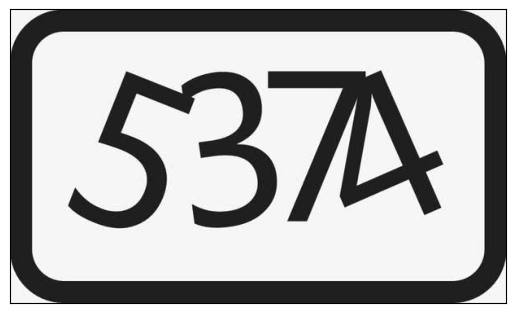

In [26]:
# matplotlib展示
import matplotlib.pyplot as plt

# BGR
img = cv2.imread(r"../images/captcha.png", 0)

plt.imshow(img, cmap='gray', )
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

1. 视频摄像头

In [29]:
import cv2 as cv

cap = cv.VideoCapture(0)  # 0代表第一个摄像头
# 默认情况下，它的分辨率为640x480
if not cap.isOpened():  # 摄像头没开打印提示信息
    print("Cannot open camera")
    exit()
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # 我们在框架上的操作到这里
    # gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) # BGR转灰度显示
    # 显示结果帧e
    # cv.imshow('frame', gray)
    cv.imshow('frame', frame)  #彩色
    if cv.waitKey(1) == ord('6'):  # 键入6退出
        break
# 完成所有操作后，释放捕获器
cap.release()
cv.destroyAllWindows()

---

In [32]:
# 从文件播放视频
import cv2 as cv


# 等比例缩放显示
def show_frame(frame):
    # 获取图像的宽度和高度
    height, width = frame.shape[:2]

    # 设置希望的缩放宽度
    desired_width = 400

    # 计算缩放比例，确保等比例缩放
    scale_factor = desired_width / width

    # 计算缩放后的新高度
    desired_height = int(height * scale_factor)

    # 缩放图像
    resized_image = cv2.resize(frame, (desired_width, desired_height))
    return resized_image


cap = cv.VideoCapture(r'C:\Users\lenovo\Videos\B09DDF33-19E2-4E42-81A4-FE589B6919E9.mov')
while cap.isOpened():
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame_re = show_frame(frame)
    cv.imshow('frame', frame_re)
    if cv.waitKey(1) == ord('6'):  # 正常下25ms,设置为1相当于快放
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...
